In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=IMPERIAL&appid=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, 1500)
lngs = np.random.uniform(-180.000, 180.000, 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)


(49.97658343575898, 148.27480389691294)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vostok
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | vallenar
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | surt
Processing Record 17 of Set 1 | pangkalanbuun
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | spearfish
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | ancud
Processing Record 22

Processing Record 35 of Set 4 | qaqortoq
Processing Record 36 of Set 4 | port hardy
Processing Record 37 of Set 4 | palmer
Processing Record 38 of Set 4 | chapais
Processing Record 39 of Set 4 | jalu
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | cape town
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | acobamba
Processing Record 44 of Set 4 | port blair
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | nainpur
Processing Record 48 of Set 4 | puerto del rosario
Processing Record 49 of Set 4 | ostersund
Processing Record 50 of Set 4 | russell
Processing Record 1 of Set 5 | maniitsoq
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | henties bay
Processing Record 4 of Set 5 | teseney
Processing Record 5 of Set 5 | te anau
Processing Record 6 of Set 5 | wanaka
Processing Record 7 of Set 5 | kununurra
Processing Record 8 of Set 5 | bluff
Processi

Processing Record 25 of Set 8 | college
Processing Record 26 of Set 8 | tharad
Processing Record 27 of Set 8 | conde
Processing Record 28 of Set 8 | nishihara
Processing Record 29 of Set 8 | ariano irpino
Processing Record 30 of Set 8 | nouadhibou
Processing Record 31 of Set 8 | victoria point
Processing Record 32 of Set 8 | birao
Processing Record 33 of Set 8 | primorsk
Processing Record 34 of Set 8 | san cristobal
Processing Record 35 of Set 8 | padang
Processing Record 36 of Set 8 | emet
Processing Record 37 of Set 8 | nyurba
Processing Record 38 of Set 8 | rudnichnyy
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | chenzhou
Processing Record 41 of Set 8 | churapcha
Processing Record 42 of Set 8 | dikson
Processing Record 43 of Set 8 | axim
Processing Record 44 of Set 8 | naze
Processing Record 45 of Set 8 | mehamn
Processing Record 46 of Set 8 | cholan
City not found. Skipping...
Processing Record 47 of Set 8 | bezdan
Processing Record 48 of Set 8 | zyryanka

Processing Record 15 of Set 12 | ravar
Processing Record 16 of Set 12 | sola
Processing Record 17 of Set 12 | luoyang
Processing Record 18 of Set 12 | cuauhtemoc
Processing Record 19 of Set 12 | san andres
Processing Record 20 of Set 12 | rio grande
Processing Record 21 of Set 12 | sao sebastiao
Processing Record 22 of Set 12 | rundu
Processing Record 23 of Set 12 | aflu
City not found. Skipping...
Processing Record 24 of Set 12 | finnsnes
Processing Record 25 of Set 12 | gizo
Processing Record 26 of Set 12 | solnechnyy
Processing Record 27 of Set 12 | skjervoy
Processing Record 28 of Set 12 | guerrero negro
Processing Record 29 of Set 12 | pau
Processing Record 30 of Set 12 | pilar do sul
Processing Record 31 of Set 12 | alakurtti
Processing Record 32 of Set 12 | piranshahr
Processing Record 33 of Set 12 | grants
Processing Record 34 of Set 12 | teya
Processing Record 35 of Set 12 | maceio
Processing Record 36 of Set 12 | esso
Processing Record 37 of Set 12 | nazca
Processing Record 3

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vostok,46.4856,135.8833,-18.51,85,100,11.97,RU,2021-02-03 02:47:22
1,Busselton,-33.6500,115.3333,79.00,54,1,5.99,AU,2021-02-03 02:49:34
2,Dingle,10.9995,122.6711,81.14,79,45,16.78,PH,2021-02-03 02:49:34
3,Vallenar,-28.5708,-70.7581,62.42,54,5,0.67,CL,2021-02-03 02:49:34
4,Albany,42.6001,-73.9662,27.00,87,100,1.99,US,2021-02-03 02:45:16
5,Ushuaia,-54.8000,-68.3000,53.60,71,75,34.52,AR,2021-02-03 02:49:34
6,Rikitea,-23.1203,-134.9692,78.39,76,27,16.98,PF,2021-02-03 02:45:48
7,Mataura,-46.1927,168.8643,64.18,69,83,8.10,NZ,2021-02-03 02:46:37
8,Upernavik,72.7868,-56.1549,-7.82,84,100,4.79,GL,2021-02-03 02:46:33
9,Hasaki,35.7333,140.8333,50.00,34,20,14.97,JP,2021-02-03 02:49:35


In [8]:
# Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# Resave df with new columns
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vostok,RU,2021-02-03 02:47:22,46.4856,135.8833,-18.51,85,100,11.97
1,Busselton,AU,2021-02-03 02:49:34,-33.6500,115.3333,79.00,54,1,5.99
2,Dingle,PH,2021-02-03 02:49:34,10.9995,122.6711,81.14,79,45,16.78
3,Vallenar,CL,2021-02-03 02:49:34,-28.5708,-70.7581,62.42,54,5,0.67
4,Albany,US,2021-02-03 02:45:16,42.6001,-73.9662,27.00,87,100,1.99
5,Ushuaia,AR,2021-02-03 02:49:34,-54.8000,-68.3000,53.60,71,75,34.52
6,Rikitea,PF,2021-02-03 02:45:48,-23.1203,-134.9692,78.39,76,27,16.98
7,Mataura,NZ,2021-02-03 02:46:37,-46.1927,168.8643,64.18,69,83,8.10
8,Upernavik,GL,2021-02-03 02:46:33,72.7868,-56.1549,-7.82,84,100,4.79
9,Hasaki,JP,2021-02-03 02:49:35,35.7333,140.8333,50.00,34,20,14.97


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

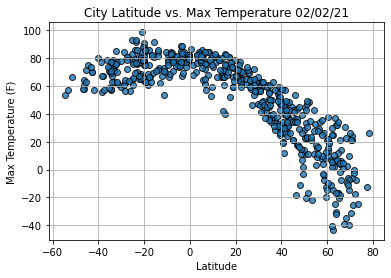

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

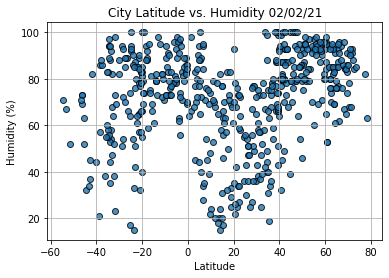

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

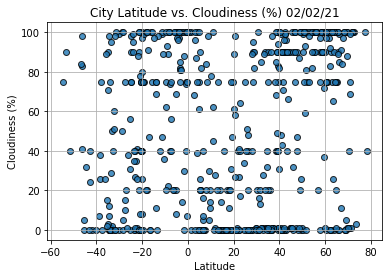

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

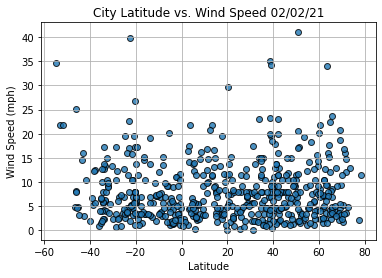

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()